In [56]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import  seaborn as sns

In [57]:
car=pd.read_csv("quikr_car .csv")
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [58]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [59]:
car.dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [60]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [61]:
backup=car.copy()

In [62]:

car=car[car['year'].str.isnumeric()]
car['year']=car['year'].astype(int)
car=car[car['Price']!='Ask For Price']
car['Price']=car['Price'].str.replace(',','').astype(int)
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
car=car[~car['fuel_type'].isna()]
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)
car.info()
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')
car=car.reset_index(drop=True)
car.describe()
car=car[car['Price']<6000000]
car.to_csv('cleaned_csv.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


C:\Users\DELL.DESKTOP-HLAN3B4\AppData\Local\Temp\ipykernel_11632\195587031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


Text(0, 0.5, 'Price')

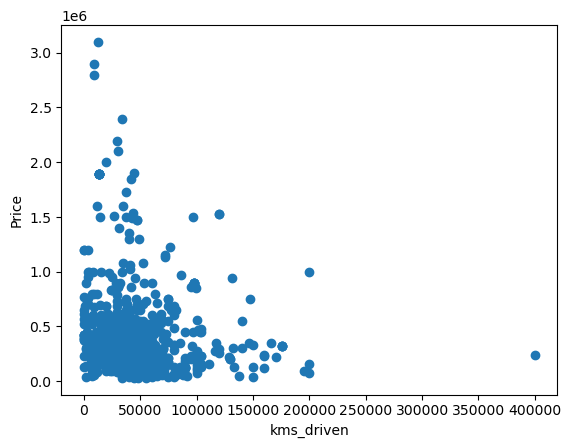

In [83]:
plt.scatter(car[['kms_driven']], car[['Price']])
plt.xlabel('kms_driven')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

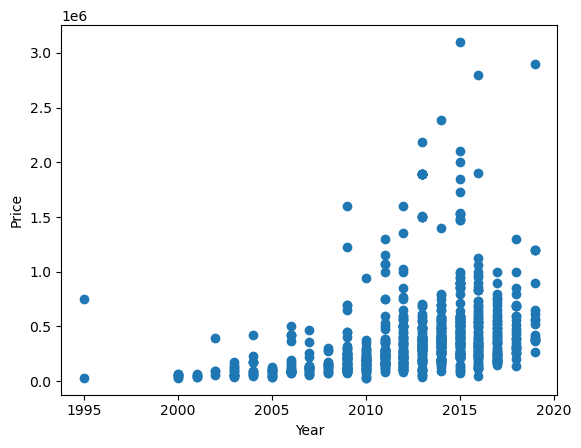

In [82]:
plt.scatter(car[['year']], car[['Price']])
plt.xlabel('Year')
plt.ylabel('Price')

In [73]:
columns_to_remove = ['name', 'company', 'fuel_type']  
temporary_df = car.drop(columns=columns_to_remove)
print(temporary_df.head())


   year   Price  kms_driven
0  2007   80000       45000
1  2006  425000          40
2  2014  325000       28000
3  2014  575000       36000
4  2012  175000       41000


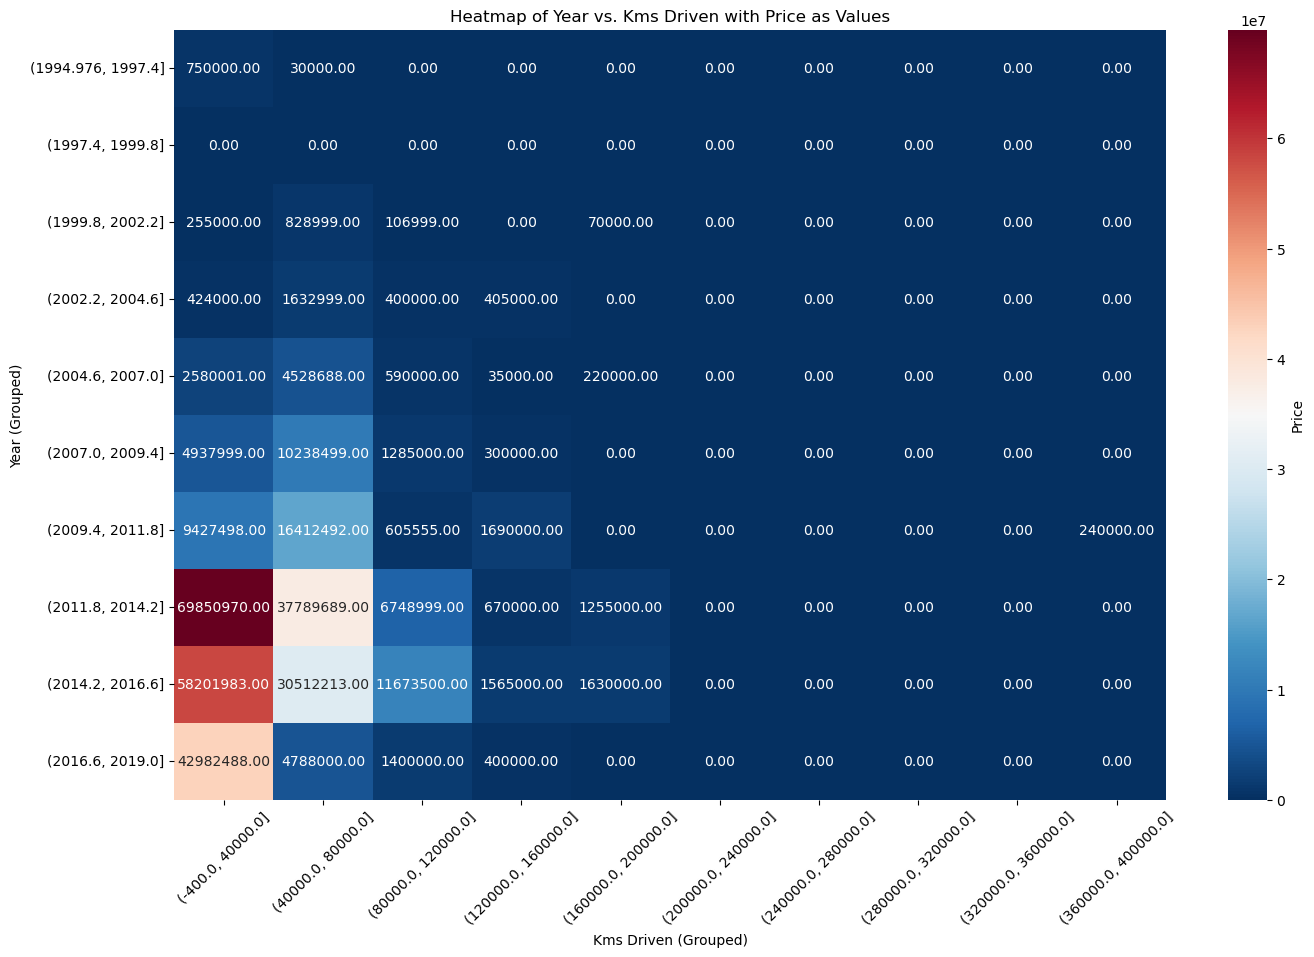

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pivot_table_data = temporary_df.pivot_table(index=pd.cut(temporary_df['year'], bins=10),
                                            columns=pd.cut(temporary_df['kms_driven'], bins=10),
                                            values='Price', aggfunc='sum')
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table_data, annot=True, cmap='RdBu_r', fmt='.2f', cbar_kws={'label': 'Price'})
plt.xlabel('Kms Driven (Grouped)')
plt.ylabel('Year (Grouped)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Heatmap of Year vs. Kms Driven with Price as Values')
plt.show()


In [37]:
X=car.drop(columns='Price')
y=car['Price']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [33]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')
lr=LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)




0.7371342952387887

In [34]:
score=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    ohe=OneHotEncoder()
    lr=LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    z=r2_score(y_test,y_pred)
    score.append(z)
m=np.argmax(score)
print(m)

# pickle.dump(pipe,open('model.pkl','wb'))

433


In [35]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(score))
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')
lr=LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8457042416667213